**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
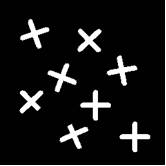
art8lab1.png: 
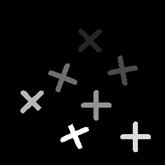
art8lab2.png: 
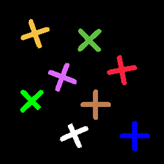
		

Tamanho da imagem :  (256, 256)


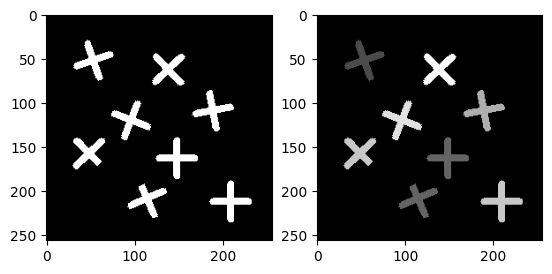

In [5]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

linhas = img.shape[0]
colunas = img.shape[1]

print('Tamanho da imagem : ', img.shape)

nova_imagem = np.zeros((linhas, colunas), dtype=int)

def dfs(imagem, x, y, visitado=None):
    #A função parte de um pixel branco (x, y) e vai recursivamente 
    #expandindo para todos os brancos conectados (8 direções), 
    #guardando-os no conjunto visitado (para não repetir).

    if visitado is None:
        visitado = set()

    if not (0 <= x < linhas and 0 <= y < colunas): #checa borda
        return visitado
    if (x, y) in visitado or imagem[x][y] != 255: #checa já visitado / não é branco
        return visitado

    visitado.add((x, y))

    vizinhos = [(x+1, y), (x-1, y), (x, y+1), (x, y-1), (x+1, y+1), (x+1, y-1), (x-1, y+1), (x-1, y-1)] #conectividade-8: 4 vizinhos ortogonais + 4 diagonais
    for vx, vy in vizinhos:
        if 0 <= vx < linhas and 0 <= vy < colunas: #checa borda do vizinho 
            if (vx, vy) not in visitado and imagem[vx][vy] == 255: #checa não visitado / se é pixel branco
                dfs(imagem, vx, vy, visitado)

    return visitado  # (fora do for)

def pinta(out_img, visitado, cor=None):
    #Recebe o conjunto de pixels da componente e preenche a 
    #saída com um tom de cinza escolhido (aleatório, dentre 
    #alguns valores altos para aparecer bem).
    if cor is None:
        cores = [250, 225, 200, 175, 150, 125, 100, 75]
        cor = random.choice(cores)
    for x, y in visitado:
        out_img[x, y] = cor

#Percorre a imagem inteira; sempre que encontra um pixel branco 
#ainda não visitado, roda dfs para pegar toda a componente a partir 
#dali, acumula essa componente e marca seus pixels no visitado_global.
visitado_global = set()
componentes = []

for i in range(linhas):
    for j in range(colunas):
        if img[i][j] == 255 and (i, j) not in visitado_global:
            comp = dfs(img, i, j)  # cada chamada gera seu próprio conjunto
            if comp:
                componentes.append(comp)
                visitado_global.update(comp)

# Pinta cada componente e mostra a imagem final à direita.
for comp in componentes:
    pinta(nova_imagem, comp, cor=None)

plt.subplot(1, 2, 2)
plt.imshow(nova_imagem, cmap='gray', vmin=0, vmax=255)
plt.show()


2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 167, isto é, valores acima de 167 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

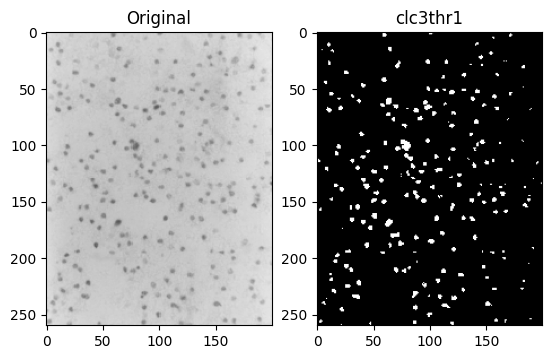

Número de objetos: 212


In [6]:
# code here
img2 = cv2.imread("clc3.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255); plt.title("Original")

linhas2 = img2.shape[0]
colunas2 = img2.shape[1]

def dfs_q2(imagem, x, y, visitado=None):
    if visitado is None:
        visitado = set()

    if not (0 <= x < linhas2 and 0 <= y < colunas2): 
        return visitado
    if (x, y) in visitado or imagem[x][y] != 1: 
        return visitado

    visitado.add((x, y))

    vizinhos2 = [(x+1, y), (x-1, y), (x, y+1), (x, y-1), (x+1, y+1), (x+1, y-1), (x-1, y+1), (x-1, y-1)] 
    for vx, vy in vizinhos2:
        if 0 <= vx < linhas2 and 0 <= vy < colunas2: 
            if (vx, vy) not in visitado and imagem[vx][vy] == 1: 
                dfs_q2(imagem, vx, vy, visitado)

    return visitado  

# Binarizando a imagem
threshold = 167
nova_imagem2 = np.zeros((linhas2, colunas2), dtype=int)

for i in range(linhas2):
    for j in range(colunas2):
        if img2[i, j] >= threshold:
            nova_imagem2[i, j] = 0
        else:
            nova_imagem2[i, j] = 1

plt.subplot(1, 2, 2)
plt.imshow(nova_imagem2, cmap='gray', vmin=0, vmax=1); plt.title("clc3thr1")
plt.show()

visitado_global2 = set()
objetos = []

for i in range(linhas2):
    for j in range(colunas2):
        if nova_imagem2[i, j] == 1 and (i, j) not in visitado_global2:
            comp2 = dfs_q2(nova_imagem2, i, j) 
            if comp2:
                visitado_global2.update(comp2)
                objetos.append(comp2)

print("Número de objetos:", len(objetos))


3. Calcule a distância média entre os objetos da imagem anterior. Mostre um histograma com as distâncias e o valor médio.

Número de centróides para a imagem: 212
Distância média entre objetos: 112.93441686460318


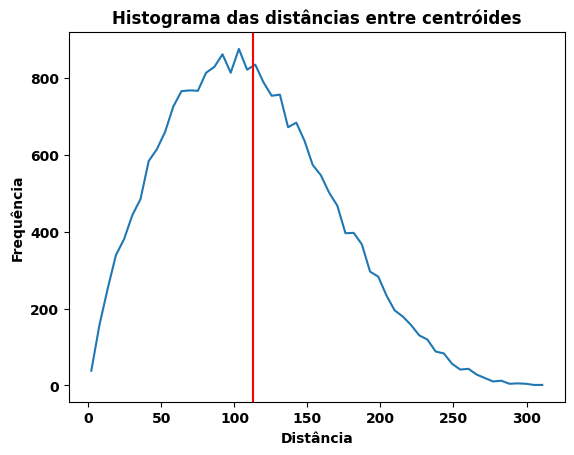

In [329]:
# code here
img3 = nova_imagem2
#plt.imshow(img3, cmap='gray', vmin=0, vmax=1); plt.title("Imagem Q2")

objetos2 = objetos
centroides = []

for comp2 in objetos2:
    xs = [x for x, y in comp2]
    ys = [y for x, y in comp2]
    cx = np.mean(xs)
    cy = np.mean(ys)
    centroides.append((cx, cy))

soma = 0
dist = np.array([], dtype=float)
n = len(centroides)

for i in range(n):
    for j in range(i+1, n):
        dist = np.append(dist, np.sqrt((centroides[i][0] - centroides[j][0])**2 + (centroides[i][1] - centroides[j][1])**2))
        soma += np.sqrt((centroides[i][0] - centroides[j][0])**2 + (centroides[i][1] - centroides[j][1])**2)

dist_media = (2 / (n*(n-1))) * soma
print("Número de centróides para a imagem:", n)
print("Distância média entre objetos:", dist_media)

hist, bins = np.histogram(dist, bins = "auto")  

plt.plot(bins[:-1], hist)  
plt.title("Histograma das distâncias entre centróides")
plt.xlabel("Distância")
plt.ylabel("Frequência")
plt.axvline(dist_media, color='red', linestyle='-', linewidth=1.5) #traça uma linha onde está a distancia média
plt.show()





4. Mostra a Transformada Distância da imagem do exercício 1

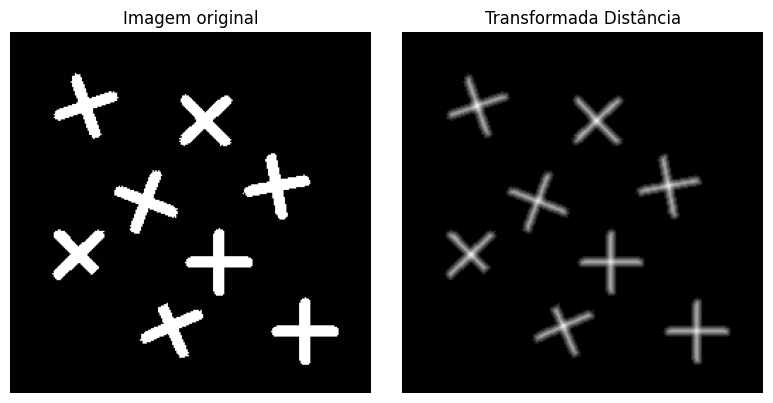

In [7]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_q4 = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_q4, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem original")
plt.axis("off")

_, bin_img = cv2.threshold(img_q4, 127, 255, cv2.THRESH_BINARY)

dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)

dist_norm = cv2.normalize(dist, None, 0, 255.0, cv2.NORM_MINMAX)
dist_norm = dist_norm.astype(np.uint8)

plt.subplot(1, 2, 2)
plt.imshow(dist_norm, cmap='gray', vmin=0, vmax=255)
plt.title("Transformada Distância")
plt.axis("off")

plt.tight_layout()
plt.show()
